# Neural Network Digit Recognisor

I designed a two-layer neural network to classify handwritten digits from the 28×28 MNIST dataset. 

Input layer (784 units) → Hidden layer (10 units, ReLU) → Output layer (10 units, softmax)

In [1]:
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visulisation

import os  

In [2]:
for root, dirs, files in os.walk('/kaggle/input'):
    for file in files:
        print(os.path.join(root, file))
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
# Load training and test datasets
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Convert to numpy arrays
train_data = np.array(train_df)
test_data = np.array(test_df)

In [4]:
# testing and training data
np.random.shuffle(train_data) # Shuffle training data to randomize examples

# Transpose for easier slicing
train_data = train_data.T
test_data = test_data.T

labels = train_data[0].astype(int) # pixel values 0-255 scaled to 0-1
features = train_data[1:] / 255.0
test_data = test_data / 255.0

In [5]:
labels

array([8, 0, 1, ..., 4, 1, 0])

In [6]:
features[0]

array([0., 0., 0., ..., 0., 0., 0.])

In [7]:
features[:, 0].shape

(784,)

The neural network processes input data through three layers: A⁰, A¹, and A². The input layer (A⁰) consists of 784 units, representing the pixel values of a flattened 28×28 grayscale image. The hidden layer (A¹) has 10 neurons that use the ReLU activation function. This layer extracts meaningful patterns from the input data. The output layer (A²) contains 10 units, each corresponding to one of the digit classes (0 through 9). It uses the softmax activation function to produce a probability distribution over these classes.

My two-layer neural network processes MNIST digits (flattened to 784 pixels) with the following structure:

1. Forward Propagation

- Input Layer:
$A^{[0]} = X$   *(784×m, flattened 28×28 images)*

- Hidden Layer:
$Z^{[1]} = A^{[1]}$  
- $W^{[1]}$: 10×784   *(input→hidden weights)*  
- $b^{[1]}$: 10×1   *(hidden layer bias)*

- Output Layer:
$Z^{[2]} = W^{[2]}A^{[1]} + b^{[2]}$  
- $W^{[2]}$: 10×10   *(hidden→output weights)*  
- $b^{[2]}$: 10×1   *(output bias)*

2. Backpropagation

- Output Gradients
$dZ^{[2]} = 10×m(A^{[2]})$   *(10×m error)*  
- $dW^{[2]}$: 10×10  
- $db^{[2]}$: 10×1   *(summed over batch)*

- Hidden Gradients
$dZ^{[1]} = 10×m(A^{[1]})$   *(10×m)*  
- $dW^{[1]}$: 10×10  
- $db^{[1]}$: 10×1


In [8]:
# Define Network Functions
def init_parameters():
    '''
    Randomly generates the weights and biases for the first generation neural network.
    '''

    W1 = np.random.rand(10, 784) - 0.5  # 10 neurons, 784 input features
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5   # output layer weights
    b2 = np.random.rand(10, 1) - 0.5    

    return W1, b1, W2, b2


In [9]:
def relu(Z):
    '''''
    ReLU activation function.
    '''
    
    return np.maximum(0, Z)

In [10]:
def softmax(Z):
    '''
    Softmax activation function for output layer.
    '''
    
    exp_Z = np.exp(Z - np.max(Z, axis=0, keepdims=True))  
    return exp_Z / np.sum(exp_Z, axis=0, keepdims=True)

In [11]:
def forward_propagation(W1, b1, W2, b2, X):
    '''
    Perform forward pass through the network.
    X -- represents the input data / input layer
    '''

    Z1 = W1.dot(X) + b1
    A1 = relu(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    
    return Z1, A1, Z2, A2

### Forward Propogation

Forward propagation is the neural network's way of processing input data to make predictions, flowing through each layer like a thought process. The input (labels) gets transformed by weights (W1, W2) and biases (b1, b2), activated by ReLU and softmax, and finally outputs probabilities (A2). It's the network's "best guess" after crunching the numbers step by step.

Data flows through the network as follows:
1. Hidden Layer Computation:
$$ Z^{[1]} = W^{[1]}X + b^{[1]} $$

$$ A^{[1]} = \text{ReLU}(Z^{[1]}) $$

2. Output Layer Computation:
$$ Z^{[2]} = W^{[2]}A^{[1]} + b^{[2]} $$

$$ A^{[2]} = \text{softmax}(Z^{[2]}) $$

In [12]:
def one_hot_encode(Y):
    '''
    Formats the expected value into an array of the correct size and format.
    '''

    one_hot = np.zeros((Y.size, Y.max() + 1))
    one_hot[np.arange(Y.size), Y] = 1
    
    return one_hot.T

In [13]:
def relu_derivative(Z):
    '''
    Derivative of ReLU activation.
    '''

    return Z > 0

def back_propagation(Z1, A1, Z2, A2, W2, X, Y):
    '''
    Runs the data from the output nodes to the input nodes and
    calculates the error in a backward motion.
    '''

    m = Y.size
    one_hot_Y = one_hot_encode(Y)

    dZ2 = 2 * (A2 - one_hot_Y)
    dW2 = (1 / m) * dZ2.dot(A1.T)
    db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)

    dZ1 = W2.T.dot(dZ2) * relu_derivative(Z1)
    dW1 = (1 / m) * dZ1.dot(X.T)
    db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)

    return dW1, db1, dW2, db2



### Backward Propogation

Backpropagation is how the neural network learns from its mistakes. It calculates how much each weight contributed to the error by working backward through the network, adjusting the weights and biases to reduce future errors. Think of it like retracing your steps to fix where you went wrong.

The gradients (dW1, db1, dW2, db2) that tell the network how to tweak its parameters for better predictions next time. It’s the "learning" in machine learning.

During training, gradients are computed to update weights and biases:

1. Output Layer Gradients:
$$ dZ^{[2]} = A^{[2]} - Y $$

$$ dW^{[2]} = \frac{1}{m} dZ^{[2]} A^{[1]T} $$

$$ db^{[2]} = \frac{1}{m} \sum dZ^{[2]} $$

2. Hidden Layer Gradients:
$$ dZ^{[1]} = W^{[2]T} dZ^{[2]} \odot \text{ReLU}'(Z^{[1]}) $$

$$ dW^{[1]} = \frac{1}{m} dZ^{[1]} X^T $$

$$ db^{[1]} = \frac{1}{m} \sum dZ^{[1]} $$

In [14]:
# update parameters
def update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate):
    '''
    Update weights and biases using gradients and learning rate.
    '''

    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    
    return W1, b1, W2, b2

In [ ]:
def gradient_descent(X, Y, learning_rate=0.15, print_every=10, accuracy_threshold=0.999, max_iterations=500):
    """
    Train the neural network until accuracy threshold is met or max iterations reached.
    
    Parameters:
        X: input features
        Y: labels
        learning_rate: step size for parameter updates
        print_every: iterations interval for printing accuracy
        accuracy_threshold: stopping accuracy criterion
        max_iterations: hard stop for training loop
    
    Returns:
        Trained parameters W1, b1, W2, b2
    """
    W1, b1, W2, b2 = init_parameters()
    iteration = 0

    while iteration <= max_iterations:
        Z1, A1, Z2, A2 = forward_propagation(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = back_propagation(Z1, A1, Z2, A2, W2, X, Y)
        W1, b1, W2, b2 = update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)

        if iteration % print_every == 0:
            predictions = np.argmax(A2, axis=0)
            accuracy = np.mean(predictions == Y)
            print(f"Iteration: {iteration}")
            print(predictions, Y)
            print(f"Accuracy: {accuracy:.6f}")

            if accuracy >= accuracy_threshold:
                print("Reached desired accuracy!")
                break

        iteration += 1

    return W1, b1, W2, b2

### Parameter Updates (Graadient Descent)
The network learns by iteratively adjusting its weights (W1, W2) and biases (b1, b2) using gradient descent - it first calculates how much each parameter contributed to the error during backpropagation (dW1, db1, dW2, db2), then updates them by taking small steps (controlled by the learning_rate) in the opposite direction of these gradients to reduce the error. This process repeats, with each forward pass making predictions, each backward pass calculating error contributions, and each parameter update fine-tuning the network's performance until either the desired accuracy is achieved or maximum iterations are reached. The learning_rate determines how aggressively these adjustments are made, balancing between fast learning and stable convergence.

The network adjusts its weights and biases using gradient descent:

$$
\begin{aligned}
W^{[2]} &= W^{[2]} - \alpha \, dW^{[2]} \\
b^{[2]} &= b^{[2]} - \alpha \, db^{[2]} \\
W^{[1]} &= W^{[1]} - \alpha \, dW^{[1]} \\
b^{[1]} &= b^{[1]} - \alpha \, db^{[1]}
\end{aligned}
$$

Where $\alpha$ is the learning rate that controls the update step size.

In [16]:
def predict(W1, b1, W2, b2, X):
    """Make predictions for input data X using trained parameters."""
    _, _, _, A2 = forward_propagation(W1, b1, W2, b2, X)
    return np.argmax(A2, axis=0)


def create_submission(predictions):
    """Create submission CSV from predictions."""
    submission_df = pd.DataFrame({
        "ImageId": np.arange(1, len(predictions) + 1),
        "Label": predictions
    })
    submission_df.to_csv("submission.csv", index=False)

In [ ]:
# Train the model
W1, b1, W2, b2 = gradient_descent(features, labels, learning_rate=0.15, print_every=10, accuracy_threshold=0.999)

# Generate predictions for the test data and save submission file
test_predictions = predict(W1, b1, W2, b2, test_data)
create_submission(test_predictions)


Iteration: 0
[3 5 6 ... 1 6 9] [8 0 1 ... 4 1 0]
Accuracy: 0.067833
Iteration: 10
[0 5 1 ... 0 1 0] [8 0 1 ... 4 1 0]
Accuracy: 0.324952
Iteration: 20
[0 0 1 ... 0 1 0] [8 0 1 ... 4 1 0]
Accuracy: 0.460524
Iteration: 30
[0 0 1 ... 4 1 0] [8 0 1 ... 4 1 0]
Accuracy: 0.550286
Iteration: 40
[8 0 1 ... 4 1 0] [8 0 1 ... 4 1 0]
Accuracy: 0.612762
Iteration: 50
[8 0 1 ... 4 1 0] [8 0 1 ... 4 1 0]
Accuracy: 0.656024
Iteration: 60
[8 0 1 ... 4 1 0] [8 0 1 ... 4 1 0]
Accuracy: 0.685929
Iteration: 70
[8 0 1 ... 4 1 0] [8 0 1 ... 4 1 0]
Accuracy: 0.717548
Iteration: 80
[8 0 1 ... 4 1 5] [8 0 1 ... 4 1 0]
Accuracy: 0.732310
Iteration: 90
[8 0 1 ... 4 1 0] [8 0 1 ... 4 1 0]
Accuracy: 0.733143
Iteration: 100
[8 0 1 ... 4 1 0] [8 0 1 ... 4 1 0]
Accuracy: 0.754500
Iteration: 110
[8 0 1 ... 4 1 0] [8 0 1 ... 4 1 0]
Accuracy: 0.769905
Iteration: 120
[8 0 1 ... 4 1 0] [8 0 1 ... 4 1 0]
Accuracy: 0.778714
Iteration: 130
[8 0 1 ... 4 1 0] [8 0 1 ... 4 1 0]
Accuracy: 0.788881
Iteration: 140
[8 0 1 ... 4 1 0

~ 88.6% accuracy on testing set.

In [18]:

def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_propagation(W1, b1, W2, b2, X)
    predictions = np.argmax(A2, axis=0)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = features[:, index, None]
    prediction = make_predictions(current_image, W1, b1, W2, b2)
    label = labels[index]
    print("Prediction:", prediction)
    print("Label:", label)
    
    # Reshape for visualization (28x28) and scale pixel values
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Let's look at a couple of examples:

Prediction: [0]
Label: 0


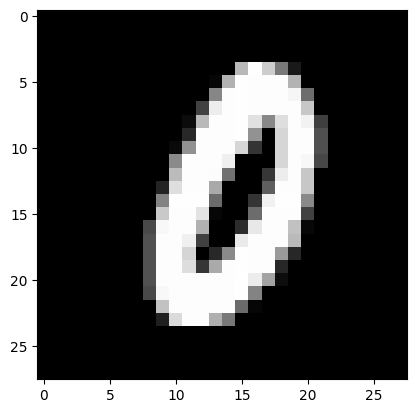

Prediction: [5]
Label: 5


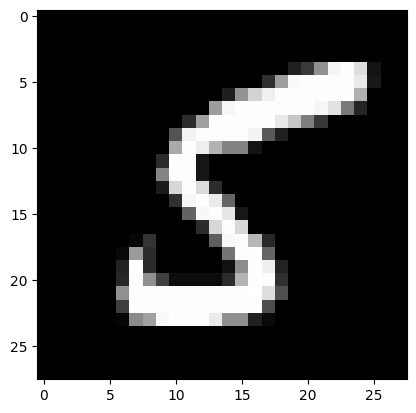

Prediction: [1]
Label: 1


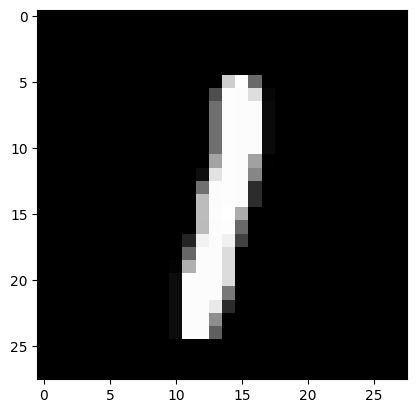

Prediction: [2]
Label: 5


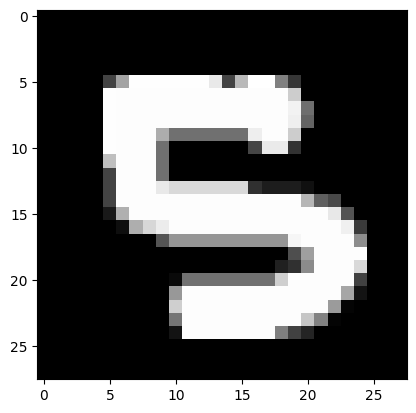

In [22]:
test_prediction(34, W1, b1, W2, b2)
test_prediction(14, W1, b1, W2, b2)
test_prediction(22, W1, b1, W2, b2)
test_prediction(42, W1, b1, W2, b2)

Finally, let's find the accuracy on the training set:

In [23]:
# Calculate accuracy on training data as a sanity check
train_preds = predict(W1, b1, W2, b2, features)
print(train_preds)
train_accuracy = np.mean(train_preds == labels)
print(f"Training accuracy: {train_accuracy}")

[8 0 1 ... 4 1 0]
Training accuracy: 0.8891666666666667


This neural network demonstrates promising results in classifying handwritten digits from the MNIST dataset, achieving approximately 88.6% accuracy on unseen test data. The model shows good generalization, with training accuracy (~88.9%) closely matching test performance, indicating minimal overfitting.